# Filtering Derau Dengan FFT

**Rio Agustian Gilang Fernando, Fisika**

**FMIPA Universitas Negeri Semarang**

## Membuat sinyal yang akan difilter

Sinyal yang digunakan memiliki frekuensi 30 Hz dan 150 Hz. 

$f(t)=\sin{(2\pi f t)}$

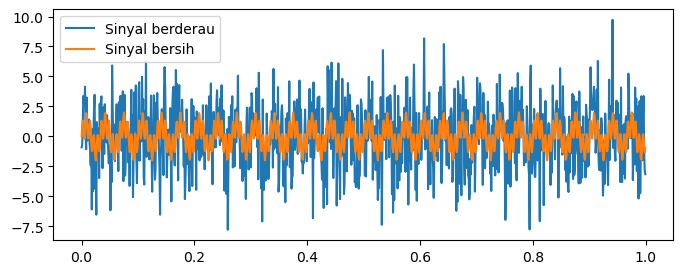

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Membuat sinyal
dt = 0.001 
t  = np.arange(0, 1, dt)
f  = np.sin(2*np.pi*30*t) + np.sin(2*np.pi*150*t)
f_clean = f
f  = f + 2.5 * np.random.randn(len(t))

plt.figure(figsize=(8,3))
plt.plot(t, f, label="Sinyal berderau")
plt.plot(t, f_clean, label="Sinyal bersih")
plt.legend()
plt.show()

## FFT dengan numpy.fft.fft

PSD (power spectrum density)

$\text{PSD} = \frac{\left|X(T)\right|^2}{N}$

Terlihat terdapat dua puncak yang bersih pada hasil plot PSD.


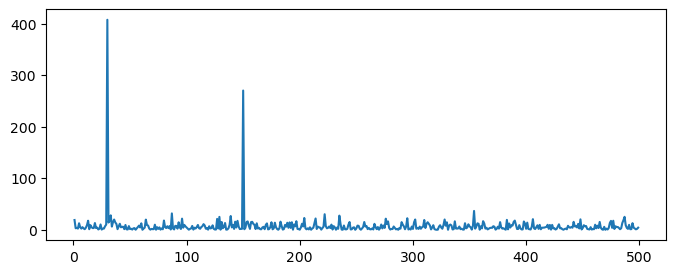

In [22]:
# FFT
n    = len(t)
fhat = np.fft.fft(f, n) 
PSD  =  np.real(fhat * np.conj(fhat) / n) # Power sepctral density
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype="int")

plt.figure(figsize=(8,3))
plt.plot(freq[L], PSD[L])
plt.show()

## Koefisien FFT yang sudah dithreshold 

Apabila ada koefisoen FFT yang memiliki PSD <= 100, frekuensi yang bersangkutan dihilangkan.

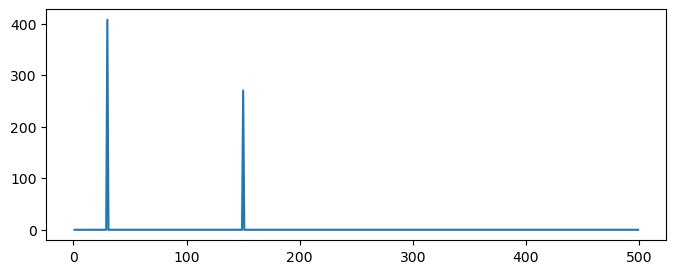

In [23]:
indices = PSD > 100
PSD_clean =  PSD * indices

plt.figure(figsize=(8,3))
plt.plot(freq[L], PSD_clean[L])
plt.show()

## Sinyal Yang sudah difitler

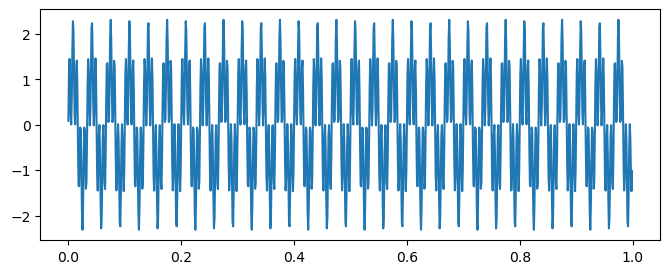

In [24]:
fhat = indices * fhat
ifft = np.real(np.fft.ifft(fhat))

plt.figure(figsize=(8,3))
plt.plot(t, ifft)
plt.show()